# 作業 : (Kaggle)鐵達尼生存預測
https://www.kaggle.com/c/titanic

# [作業目標]
- 試著調整特徵篩選的門檻值, 觀察會有什麼影響效果

# [作業重點]
- 調整相關係數過濾法的篩選門檻, 看看篩選結果的影響 (In[5]~Out[8])
- 調整L1 嵌入法篩選門檻, 看看篩選結果的影響 (In[9]~Out[11])

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

data_path = 'data/'
df = pd.read_csv(data_path + 'titanic_train.csv')

train_Y = df['Survived']
df = df.drop(['PassengerId'], axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
df = df.fillna(-1)
MMEncoder = MinMaxScaler()
df.head()

6 Numeric Features : ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


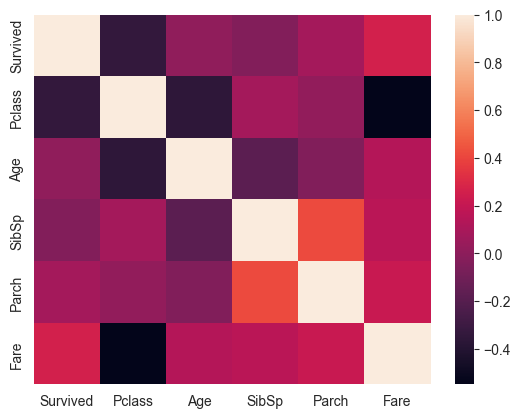

In [3]:
# 計算df整體相關係數, 並繪製成熱圖
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
sns.heatmap(corr)
plt.show()

In [4]:
corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,0.012439,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.359728,0.083081,0.018443,-0.549500
Age,0.012439,-0.359728,1.000000,-0.182282,-0.045272,0.135707
SibSp,-0.035322,0.083081,-0.182282,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.045272,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.135707,0.159651,0.216225,1.000000


# 作業1
- 鐵達尼生存率預測中，試著變更兩種以上的相關係數門檻值，觀察預測能力是否提升?

##### Ans
- 在作業與範例中，調整相關係數門檻值的效果並不如預期，沒有提升反而下降
- 由於門檻的決定沒有一定的準則，可能是因為特徵選擇的門檻值設定不當，導致模型無法有效的選擇特徵。

In [5]:
# 刪除 Survived
df = df.drop(['Survived'], axis=1)

# 原始特徵 + 羅吉斯迴歸
train_X = MMEncoder.fit_transform(df)
estimator = LogisticRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.701537882116628

In [6]:
# 篩選特徵1 - 篩選相關係數大於 0.05 或小於 -0.05 的特徵
high_list = list(corr[(corr['Survived'] > 0.05) | (corr['Survived'] < -0.05)].index)
high_list.pop(0)
print(high_list)

['Pclass', 'Parch', 'Fare']


In [7]:
# 篩選特徵1 + 羅吉斯迴歸
train_X = MMEncoder.fit_transform(df[high_list])
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.6858263762475676

In [8]:
# 篩選特徵2 - 篩選相關係數大於 0.1 或小於 -0.1 的特徵
high_list = list(corr[(corr['Survived'] > 0.1) | (corr['Survived'] < -0.1)].index)
high_list.pop(0)
print(high_list)

['Pclass', 'Fare']


In [9]:
# 篩選特徵2 + 羅吉斯迴歸
train_X = MMEncoder.fit_transform(df[high_list])
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.6790973573535873

# 作業2
- 續上題，使用 L1 Embedding 做特徵選擇(自訂門檻)，觀察預測能力是否提升?

##### Ans
- 在作業與範例中，L1 Embedding 的效果並不如預期，沒有提升反而下降
- 由於門檻的決定沒有一定的準則，可能是因為特徵選擇的門檻值設定不當，導致模型無法有效的選擇特徵。

In [10]:
from sklearn.linear_model import Lasso

L1_Reg = Lasso(alpha=0.005)
train_X = MMEncoder.fit_transform(df)
L1_Reg.fit(train_X, train_Y)
L1_Reg.coef_

array([-0.39126312, -0.1355752 , -0.        ,  0.03068895,  0.        ])

In [11]:
from itertools import compress

L1_mask = list((L1_Reg.coef_ > 0) | (L1_Reg.coef_ < 0))
L1_list = list(compress(list(df), list(L1_mask)))
L1_list

['Pclass', 'Age', 'Parch']

In [12]:
# L1_Embedding 特徵 + 線性迴歸
train_X = MMEncoder.fit_transform(df[L1_list])
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.6992906911053921